In [22]:
import tensorflow as tf
import keras as keras
import sys

In [23]:
print(tf.__version__)
print(keras.__version__)
print(sys.version)

2.6.0
2.6.0
3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]


In [24]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

In [25]:
### 데이터 셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [26]:
x_train_n = x_train.copy()
y_train_n = y_train.copy()
x_test_n = x_test.copy()
y_test_n = y_test.copy()

In [27]:
# 데이터 셋 크기
# 60000개의 학습용 데이터 셋, 10000개의 테스트 데이터 셋
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [28]:
import matplotlib.pyplot as plt

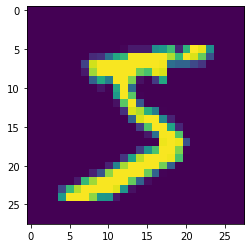

In [29]:
### x_train 의 하나의 데이터 확인
### 60000장의 이미지( 28, 28 숫자데이터)

plt.imshow(x_train[0])

label=[5 0 4 1 9 2 1 3 1 4]


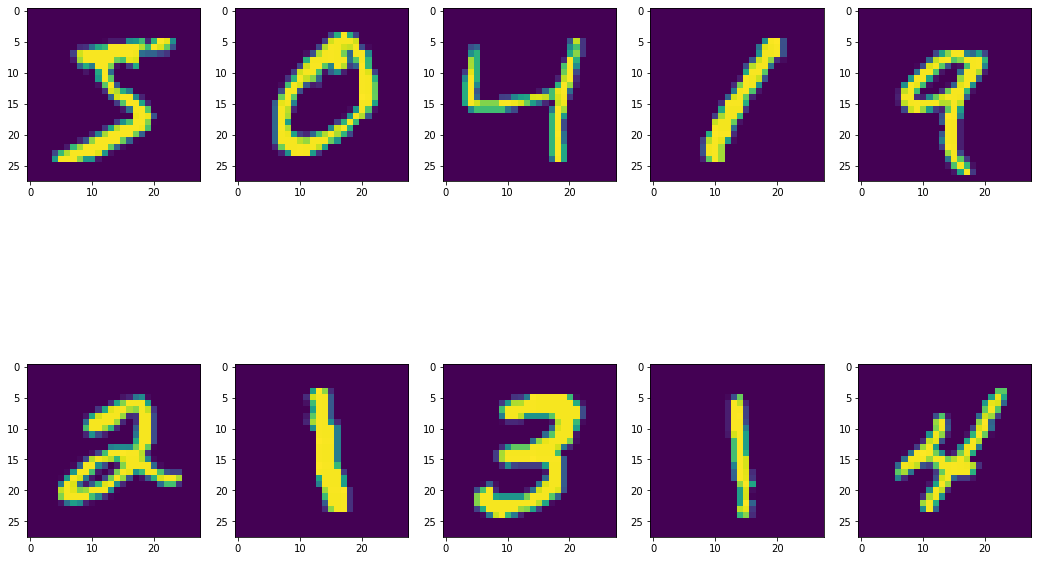

In [30]:
figure,axes = plt.subplots(nrows=2, ncols=5)  # 3행 5열의 구조 
figure.set_size_inches(18,12)  # 전체 크기

print("label={}".format(y_train[0:10]))   # y 레이블 데이터 0~10개 확인

col = 0
for row in range(0,2):
    col = row * 5
    axes[row][0].imshow(x_train[col])  # 0,5,10의 값을 갖는 위치 값 이미지 표시
    axes[row][1].imshow(x_train[col+1])# 1,6,11의 값을 갖는 위치 값 이미지 표시
    axes[row][2].imshow(x_train[col+2])# 2,7,12의 값을 갖는 위치 값 이미지 표시
    axes[row][3].imshow(x_train[col+3])# 3,8,13의 값을 갖는 위치 값 이미지 표시
    axes[row][4].imshow(x_train[col+4])# 4,9,114의 값을 갖는 위치 값 이미지 표시

In [31]:
## 데이터 셋의 변경 60000, 28, 28  -> 60000, 784 (28*28)
## 데이터 셋의 변경 10000, 28, 28  -> 10000, 784 (28*28)
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [32]:
## 데이터 셋의 변경 60000,   -> 60000, 10 (28*28)
## 데이터 셋의 변경 10000,   -> 10000, 10 (28*28)
print(y_train.shape, y_test.shape)
print(y_train[0:5])
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(y_train.shape, y_test.shape)
print(y_train[0:5])

(60000,) (10000,)
[5 0 4 1 9]
(60000, 10) (10000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [33]:
## 데이터 자료형 변경
## 01. 실수형 변경.
## 02. 값의 범위를 정규화(0~255) -> 0~1로 변경
print(x_train[0])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
print(x_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [34]:
model = Sequential()
model.add( Dense(units=64, input_dim=28*28, activation='tanh')) #입력층(28*28=784노드) - 은닉층(64개노드)
model.add( Dense(32))
model.add( Activation('tanh') )
model.add( Dense(32))
model.add( Activation('tanh') )
# 한줄로 한다면 
# model.add(Dense(32, activation='tanh'))

model.add(Dense(units=10, activation='softmax'))                # 출력층(10개 노드) 

In [35]:
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', metrics=['accuracy'])

In [36]:
# hist = model.fit(x_train, y_train, epochs=5, batch_size=32)
hist = model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7006 - accuracy: 0.8277
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3326 - accuracy: 0.9095
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2687 - accuracy: 0.9250
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2297 - accuracy: 0.9348
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2000 - accuracy: 0.9423
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1762 - accuracy: 0.9493
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1576 - accuracy: 0.9548
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1419 - accuracy: 0.9585
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1296 - accuracy: 0.9624
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.119

In [37]:
# 10번의 epoch마다의 loss(손실)과 accuracy(정확도)의 값.
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['accuracy'])

## training loss and acc ##
[0.7006486058235168, 0.3326437175273895, 0.26865851879119873, 0.22969450056552887, 0.19997800886631012, 0.17617981135845184, 0.15761497616767883, 0.14194919168949127, 0.12958739697933197, 0.1193922609090805]
[0.8277166485786438, 0.9095333218574524, 0.9249666929244995, 0.9347666501998901, 0.9423499703407288, 0.9492999911308289, 0.9548333287239075, 0.9585333466529846, 0.9623500108718872, 0.9650499820709229]


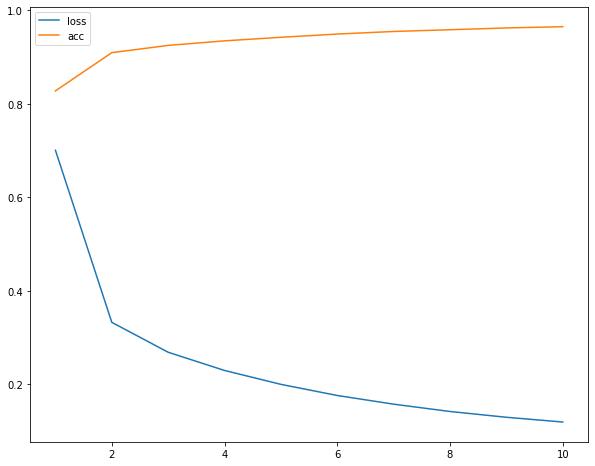

In [38]:
plt.figure(figsize=(10,8),facecolor='white')
x_lim = range(1,11)
plt.plot(x_lim,  hist.history['loss'])
plt.plot(x_lim,  hist.history['accuracy'])
plt.legend(['loss','acc'])

In [39]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)  # 최종 데이터 loss와 정확도(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.1211 - accuracy: 0.9629
## evaluation loss and_metrics ##
[0.12108481675386429, 0.9628999829292297]
